In [1]:
import os
import sys

lib_path = os.path.abspath(os.path.join('..'))
if lib_path not in sys.path:
    sys.path.append(lib_path)

In [2]:
import pandas as pd
from lib.helper import load_coin_data, filter_by_years, split_train_test

In [3]:
# load dataset
df = load_coin_data()

In [4]:
# build model for bitcoin only
df = df[df['slug'] == 'bitcoin'].reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2041 entries, 0 to 2040
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   slug         2041 non-null   object        
 1   symbol       2041 non-null   object        
 2   name         2041 non-null   object        
 3   date         2041 non-null   datetime64[ns]
 4   ranknow      2041 non-null   int64         
 5   open         2041 non-null   float64       
 6   high         2041 non-null   float64       
 7   low          2041 non-null   float64       
 8   close        2041 non-null   float64       
 9   volume       2041 non-null   float64       
 10  market       2041 non-null   float64       
 11  close_ratio  2041 non-null   float64       
 12  spread       2041 non-null   float64       
 13  next_close   2041 non-null   float64       
 14  next_return  2041 non-null   float64       
dtypes: datetime64[ns](1), float64(10), int64(1), object(3)


In [5]:
df

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread,next_close,next_return
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0.000000e+00,1.488567e+09,0.5438,3.88,144.54,0.076969
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0.000000e+00,1.603769e+09,0.7813,13.49,139.00,-0.038328
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0.000000e+00,1.542813e+09,0.3843,12.88,116.99,-0.158345
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0.000000e+00,1.298955e+09,0.2882,32.17,105.21,-0.100692
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0.000000e+00,1.168517e+09,0.3881,33.32,97.75,-0.070906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2036,bitcoin,BTC,Bitcoin,2018-11-24,1,4347.69,4413.09,3795.16,3880.76,4.679500e+09,6.749563e+10,0.1385,617.93,4009.97,0.033295
2037,bitcoin,BTC,Bitcoin,2018-11-25,1,3880.78,4120.87,3585.06,4009.97,6.825640e+09,6.974927e+10,0.7930,535.81,3779.13,-0.057567
2038,bitcoin,BTC,Bitcoin,2018-11-26,1,4015.07,4107.14,3643.92,3779.13,6.476900e+09,6.573929e+10,0.2919,463.22,3820.72,0.011005
2039,bitcoin,BTC,Bitcoin,2018-11-27,1,3765.95,3862.96,3661.01,3820.72,5.998720e+09,6.646897e+10,0.7908,201.95,4257.42,0.114298


In [6]:
# we'll use three previous closing prices as the input variables. ('close', 'close-1', 'close-2')
df['close-1'] = df['close'].shift(1)
df['close-2'] = df['close'].shift(2)
df = df.dropna()


In [7]:
df

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread,next_close,next_return,close-1,close-2
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0.000000e+00,1.542813e+09,0.3843,12.88,116.99,-0.158345,144.54,134.21
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0.000000e+00,1.298955e+09,0.2882,32.17,105.21,-0.100692,139.00,144.54
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0.000000e+00,1.168517e+09,0.3881,33.32,97.75,-0.070906,116.99,139.00
5,bitcoin,BTC,Bitcoin,2013-05-03,1,106.25,108.13,79.10,97.75,0.000000e+00,1.085995e+09,0.6424,29.03,112.50,0.150895,105.21,116.99
6,bitcoin,BTC,Bitcoin,2013-05-04,1,98.10,115.00,92.50,112.50,0.000000e+00,1.250317e+09,0.8889,22.50,115.91,0.030311,97.75,105.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2036,bitcoin,BTC,Bitcoin,2018-11-24,1,4347.69,4413.09,3795.16,3880.76,4.679500e+09,6.749563e+10,0.1385,617.93,4009.97,0.033295,4347.11,4365.94
2037,bitcoin,BTC,Bitcoin,2018-11-25,1,3880.78,4120.87,3585.06,4009.97,6.825640e+09,6.974927e+10,0.7930,535.81,3779.13,-0.057567,3880.76,4347.11
2038,bitcoin,BTC,Bitcoin,2018-11-26,1,4015.07,4107.14,3643.92,3779.13,6.476900e+09,6.573929e+10,0.2919,463.22,3820.72,0.011005,4009.97,3880.76
2039,bitcoin,BTC,Bitcoin,2018-11-27,1,3765.95,3862.96,3661.01,3820.72,5.998720e+09,6.646897e+10,0.7908,201.95,4257.42,0.114298,3779.13,4009.97


In [8]:
train, test = split_train_test(df)

X_train = train[['close', 'close-1', 'close-2']].values
X_test = test[['close', 'close-1', 'close-2']].values

y_train = train['next_close'].values
y_test = test['next_close'].values

In [9]:
from sklearn.preprocessing import MinMaxScaler

def scale_data(data):
    scaler = MinMaxScaler()
    data_scaled = scaler.fit_transform(data)
    return scaler, data_scaled


X_train_scaler, X_train_scaled = scale_data(X_train)
X_test_scaler, X_test_scaled = scale_data(X_test)

y_train_reshaped = y_train.reshape(-1, 1)
y_test_reshaped = y_test.reshape(-1, 1)

y_train_scaler, y_train_scaled = scale_data(y_train_reshaped)
y_test_scaler, y_test_scaled = scale_data(y_test_reshaped)

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 9.8047e-04 - mean_absolute_error: 0.0221 - mean_squared_error: 9.8047e-04 - r2_score: -0.8976 - root_mean_squared_error: 0.0312 - val_loss: 0.0386 - val_mean_absolute_error: 0.1566 - val_mean_squared_error: 0.0386 - val_r2_score: 0.0793 - val_root_mean_squared_error: 0.1964
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2.6138e-04 - mean_absolute_error: 0.0120 - mean_squared_error: 2.6138e-04 - r2_score: 0.5339 - root_mean_squared_error: 0.0159 - val_loss: 0.0040 - val_mean_absolute_error: 0.0418 - val_mean_squared_error: 0.0040 - val_r2_score: 0.9053 - val_root_mean_squared_error: 0.0630
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.2530e-04 - mean_absolute_error: 0.0093 - mean_squared_error: 1.2530e-04 - r2_score: 0.7794 - root_mean_squared_error: 0.0110 - val_loss: 6.9229e-04 - val_mean_absolute_error: 0.0163 - val_mean_squared_error: 6.9229e-04 - val_r2_score: 0.9835 - val_root_mean_squared_error: 0.026

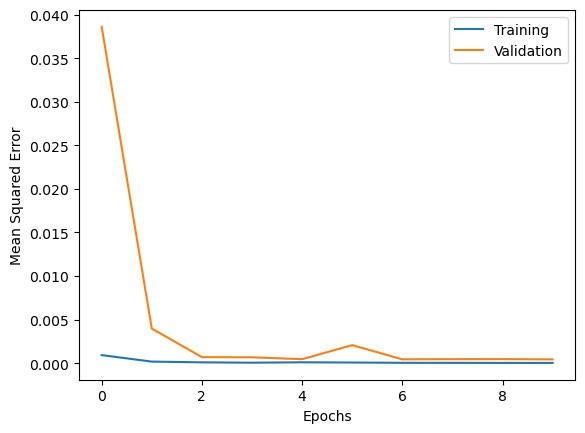

In [10]:
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout
import matplotlib.pyplot as plt

model = Sequential([
    Input(shape=(3,)),
    Dense(128, activation='relu'),
    Dense(256, activation='relu'),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='linear')
])

model.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['mean_absolute_error', 
             'mean_squared_error',
             'root_mean_squared_error',
             'r2_score']
)

history = model.fit(
    X_train_scaled,
    y_train_scaled,
    batch_size=256,
    epochs=10,
    validation_split=0.2,
    shuffle=False)

plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

In [11]:
#
# Evaluate the model with test data
#
model.evaluate(X_test_scaled, y_test_scaled, return_dict=True)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0047 - mean_absolute_error: 0.0458 - mean_squared_error: 0.0047 - r2_score: 0.8592 - root_mean_squared_error: 0.0659 


{'loss': 0.002215991960838437,
 'mean_absolute_error': 0.029565371572971344,
 'mean_squared_error': 0.002215991960838437,
 'r2_score': 0.9407700300216675,
 'root_mean_squared_error': 0.0470743253827095}

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


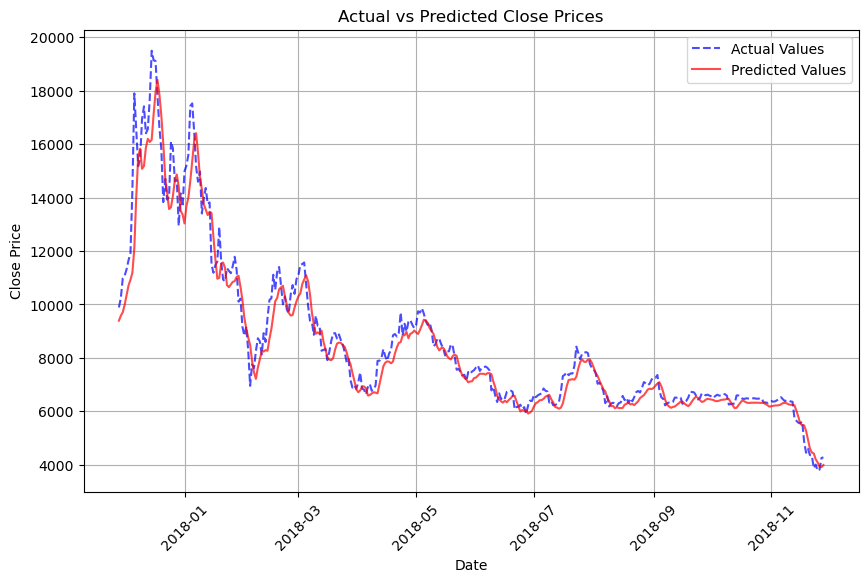

In [12]:
#
# Get predicted prices and plot against true prices
#
y_pred_scaled = model.predict(X_test_scaled)
y_pred = y_test_scaler.inverse_transform(y_pred_scaled)

plt.figure(figsize=(10, 6))
plt.plot(test['date'], y_test, label='Actual Values', color='blue', linestyle='dashed', alpha=0.7)
plt.plot(test['date'], y_pred, label='Predicted Values', color='red', alpha=0.7)
plt.title('Actual vs Predicted Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.grid(True)
plt.show()

In [13]:
from sklearn.metrics import explained_variance_score, max_error, r2_score, mean_absolute_error, mean_squared_error

explained_variance = explained_variance_score(y_test, y_pred)
max_err = max_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Explained Variance: {explained_variance}")
print(f"Max Error: {max_err}")
print(f"R-Squared: {r_squared}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")

Explained Variance: 0.9471435236793194
Max Error: 5790.097460937501
R-Squared: 0.9407699849504377
Mean Absolute Error (MAE): 464.7165043331626
Mean Squared Error (MSE): 547491.9914749407
